<a href="https://colab.research.google.com/github/starceees/CAD-Models/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
# Define hyperparameters
batch_size = 16
latent_dim = 100
num_epochs = 50
learning_rate = 0.0001

In [15]:
# Load and preprocess the FashionMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [16]:
# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [17]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [47]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 7*7*256, bias=False),
            nn.Unflatten(1, (256, 7, 7)),
            nn.ConvTranspose2d(256, 128, kernel_size=5, stride=1, padding=2, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.3),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.3),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [48]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.3),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.3),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1)
        )

    def forward(self, x):
        return self.model(x)

In [49]:

# Create generator and discriminator instances
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [50]:
# Define loss function and optimizers
criterion = nn.BCEWithLogitsLoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)

Epoch [1/50], Train G Loss: 0.8653, Train D Loss: 1.1160, Val G Loss: 0.8939, Val D Loss: 1.1814
Epoch [2/50], Train G Loss: 1.4472, Train D Loss: 0.7555, Val G Loss: 1.3020, Val D Loss: 0.9661
Epoch [3/50], Train G Loss: 0.8442, Train D Loss: 1.1140, Val G Loss: 1.0379, Val D Loss: 1.0468
Epoch [4/50], Train G Loss: 0.7200, Train D Loss: 1.1969, Val G Loss: 0.8386, Val D Loss: 1.1175
Epoch [5/50], Train G Loss: 1.3268, Train D Loss: 0.9042, Val G Loss: 1.3048, Val D Loss: 1.0646
Epoch [6/50], Train G Loss: 0.8427, Train D Loss: 1.1955, Val G Loss: 1.0003, Val D Loss: 1.0977
Epoch [7/50], Train G Loss: 1.0513, Train D Loss: 0.9879, Val G Loss: 0.8994, Val D Loss: 1.1089
Epoch [8/50], Train G Loss: 1.0351, Train D Loss: 1.1409, Val G Loss: 0.9961, Val D Loss: 1.1088
Epoch [9/50], Train G Loss: 0.9290, Train D Loss: 1.2342, Val G Loss: 0.9736, Val D Loss: 1.1748
Epoch [10/50], Train G Loss: 0.8099, Train D Loss: 1.3121, Val G Loss: 1.0082, Val D Loss: 1.1483


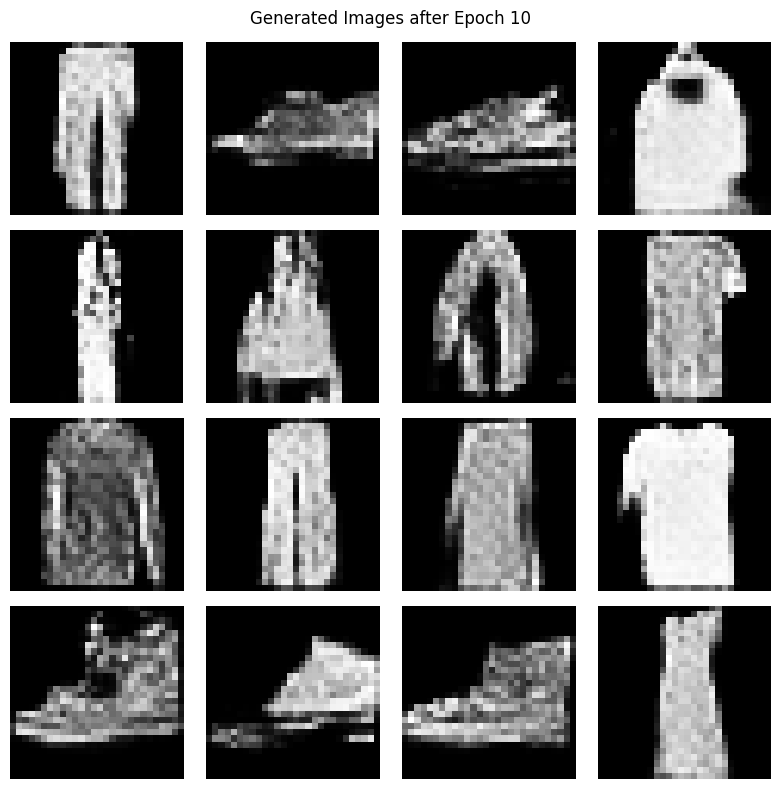

Epoch [11/50], Train G Loss: 0.9444, Train D Loss: 1.3916, Val G Loss: 0.9819, Val D Loss: 1.2292
Epoch [12/50], Train G Loss: 0.6596, Train D Loss: 1.4999, Val G Loss: 0.8470, Val D Loss: 1.2921
Epoch [13/50], Train G Loss: 0.9381, Train D Loss: 1.1498, Val G Loss: 0.9533, Val D Loss: 1.1315
Epoch [14/50], Train G Loss: 1.0269, Train D Loss: 1.1661, Val G Loss: 0.9182, Val D Loss: 1.1679
Epoch [15/50], Train G Loss: 0.8969, Train D Loss: 1.4312, Val G Loss: 1.0204, Val D Loss: 1.1996
Epoch [16/50], Train G Loss: 0.9738, Train D Loss: 1.1353, Val G Loss: 0.9988, Val D Loss: 1.1002
Epoch [17/50], Train G Loss: 0.8955, Train D Loss: 1.2440, Val G Loss: 1.0627, Val D Loss: 1.1431
Epoch [18/50], Train G Loss: 0.8710, Train D Loss: 1.1218, Val G Loss: 0.8557, Val D Loss: 1.1331
Epoch [19/50], Train G Loss: 1.3243, Train D Loss: 1.0136, Val G Loss: 1.1314, Val D Loss: 1.1322
Epoch [20/50], Train G Loss: 1.0887, Train D Loss: 1.1618, Val G Loss: 1.1765, Val D Loss: 1.1195
Epoch [21/50], Train

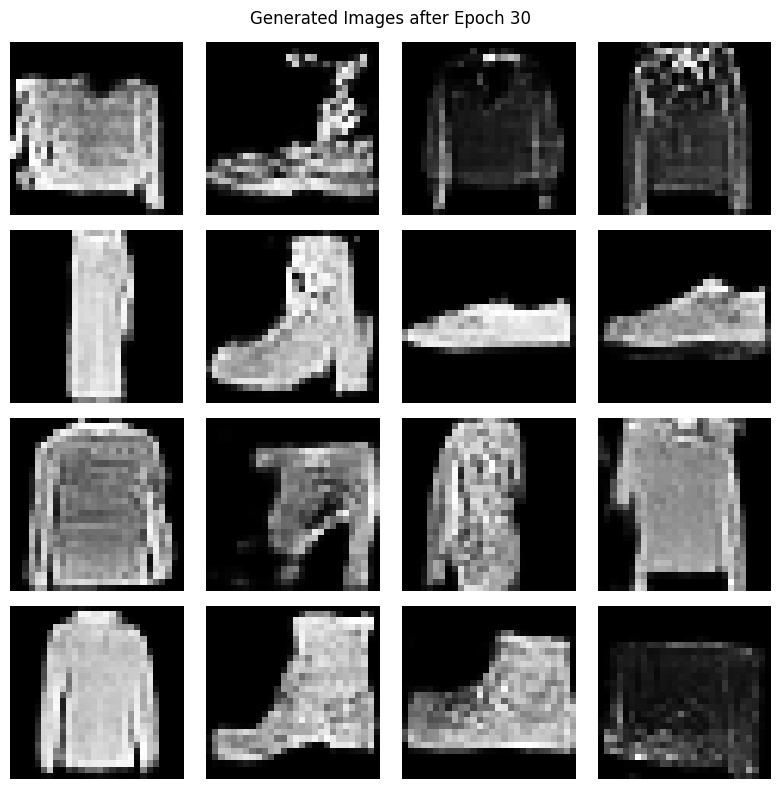

Epoch [31/50], Train G Loss: 0.9308, Train D Loss: 1.2074, Val G Loss: 1.0298, Val D Loss: 1.1483
Epoch [32/50], Train G Loss: 1.2085, Train D Loss: 1.0435, Val G Loss: 1.1770, Val D Loss: 1.1194
Epoch [33/50], Train G Loss: 0.9361, Train D Loss: 1.1950, Val G Loss: 1.0690, Val D Loss: 1.1319
Epoch [34/50], Train G Loss: 0.8290, Train D Loss: 1.1805, Val G Loss: 0.7723, Val D Loss: 1.1529
Epoch [35/50], Train G Loss: 1.1955, Train D Loss: 1.0441, Val G Loss: 1.1679, Val D Loss: 1.1044
Epoch [36/50], Train G Loss: 1.1950, Train D Loss: 1.2756, Val G Loss: 1.4307, Val D Loss: 1.1197
Epoch [37/50], Train G Loss: 0.9638, Train D Loss: 0.9749, Val G Loss: 0.8968, Val D Loss: 1.1302
Epoch [38/50], Train G Loss: 1.4869, Train D Loss: 1.0085, Val G Loss: 1.4308, Val D Loss: 1.1165
Epoch [39/50], Train G Loss: 1.3493, Train D Loss: 1.0830, Val G Loss: 1.2299, Val D Loss: 1.0587
Epoch [40/50], Train G Loss: 1.1255, Train D Loss: 1.1372, Val G Loss: 1.1658, Val D Loss: 1.1151
Epoch [41/50], Train

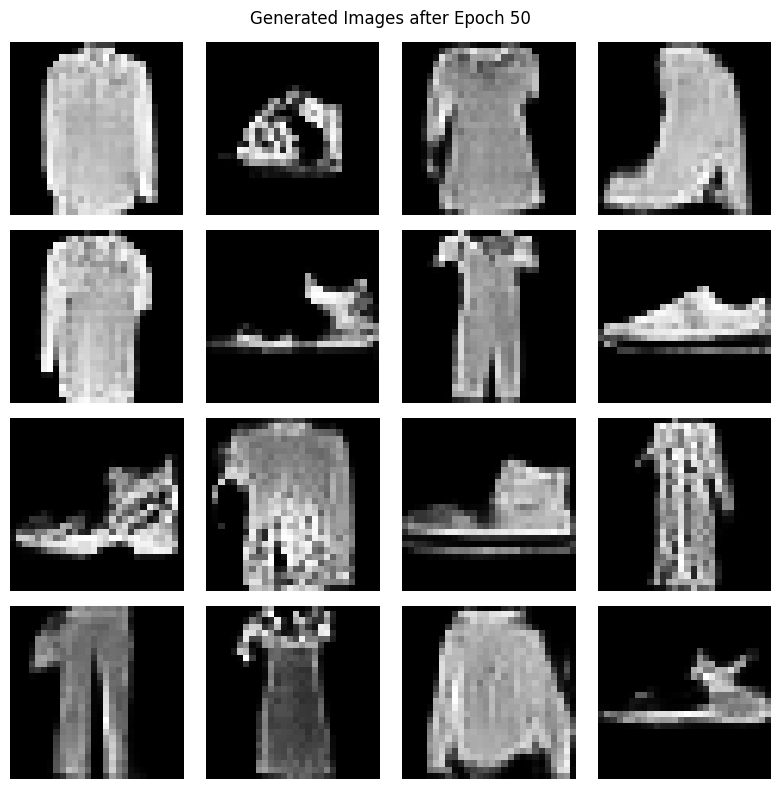

In [51]:
# Training loop
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Train discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, latent_dim).to(device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train generator
        optimizer_G.zero_grad()
        noise = torch.randn(batch_size, latent_dim).to(device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        g_loss = criterion(fake_outputs, real_labels)

        g_loss.backward()
        optimizer_G.step()

    # Validate on validation set
    generator.eval()
    discriminator.eval()
    val_g_loss = 0.0
    val_d_loss = 0.0
    with torch.no_grad():
        for real_images, _ in val_loader:
            real_images = real_images.to(device)
            batch_size = real_images.size(0)

            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            real_outputs = discriminator(real_images)
            real_loss = criterion(real_outputs, real_labels)

            noise = torch.randn(batch_size, latent_dim).to(device)
            fake_images = generator(noise)
            fake_outputs = discriminator(fake_images)
            fake_loss = criterion(fake_outputs, fake_labels)

            d_loss = real_loss + fake_loss
            val_d_loss += d_loss.item()

            fake_outputs = discriminator(fake_images)
            g_loss = criterion(fake_outputs, real_labels)
            val_g_loss += g_loss.item()

    val_g_loss /= len(val_loader)
    val_d_loss /= len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train G Loss: {g_loss.item():.4f}, Train D Loss: {d_loss.item():.4f}, Val G Loss: {val_g_loss:.4f}, Val D Loss: {val_d_loss:.4f}")

    # Display intermediate images
    if (epoch + 1) in [10, 30, 50]:
        fake_images = fake_images.detach().cpu().numpy()
        fake_images = np.transpose(fake_images, (0, 2, 3, 1))
        fake_images = (fake_images + 1) / 2  # Rescale images to [0, 1]

        fig, axs = plt.subplots(4, 4, figsize=(8, 8))
        plt.suptitle(f"Generated Images after Epoch {epoch + 1}")
        for i in range(4):
            for j in range(4):
                axs[i, j].imshow(fake_images[i*4+j, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
        plt.tight_layout()
        plt.show()

In [52]:
# Test on test set
generator.eval()
discriminator.eval()
test_g_loss = 0.0
test_d_loss = 0.0
with torch.no_grad():
    for real_images, _ in test_loader:
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, latent_dim).to(device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        fake_loss = criterion(fake_outputs, fake_labels)

        d_loss = real_loss + fake_loss
        test_d_loss += d_loss.item()

        fake_outputs = discriminator(fake_images)
        g_loss = criterion(fake_outputs, real_labels)
        test_g_loss += g_loss.item()

test_g_loss /= len(test_loader)
test_d_loss /= len(test_loader)

print(f"Test G Loss: {test_g_loss:.4f}, Test D Loss: {test_d_loss:.4f}")

Test G Loss: 1.2749, Test D Loss: 1.0675
